In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from scipy.stats import spearmanr

plt.rcParams.update({
    "font.size": 9,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "figure.dpi": 150
})
sns.set_style("white")

/scratch/local/ipykernel_22584/2546120805.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


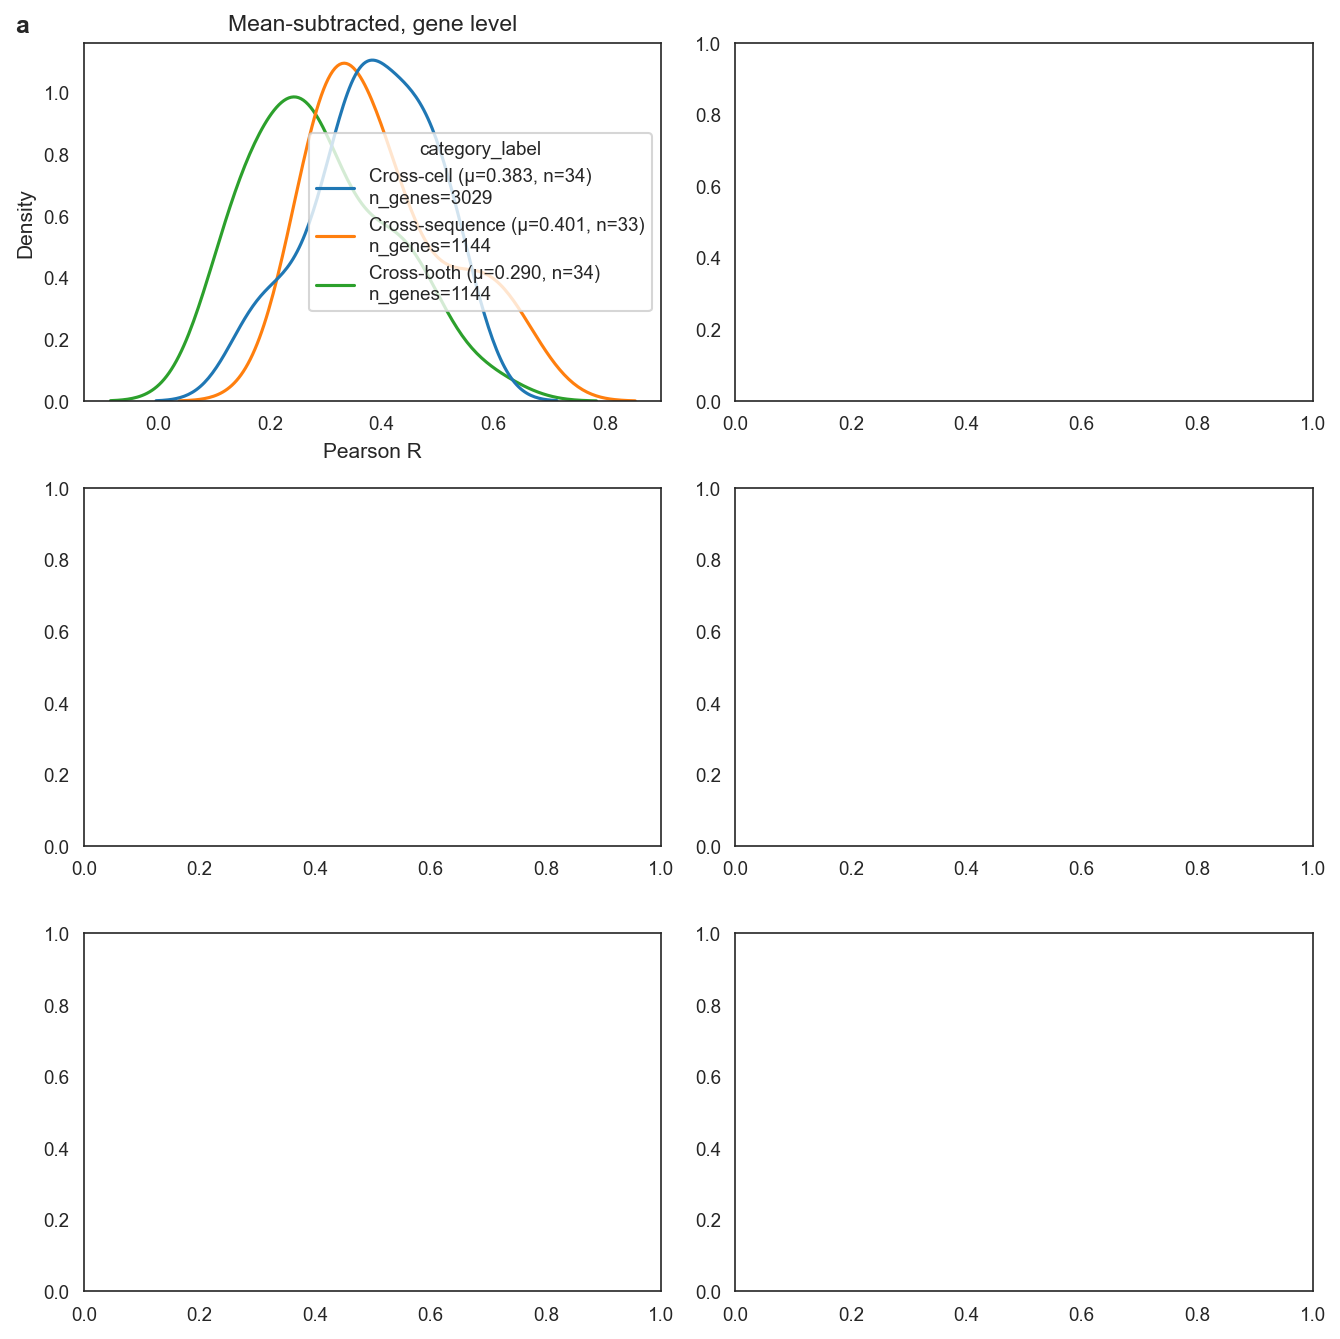

In [8]:
def create_figure5(
    cross_cell='../processed_data/figure2/gene_level_cross_celltype/correlations_coding_genes.csv',
    cross_sequence='../processed_data/figure2/gene_level_cross_region/correlations_coding_genes.csv',
    cross_both='../processed_data/figure2/gene_level_cross_both/correlations_coding_genes.csv',
    n_genes_list = {'Cross-cell':3029, 'Cross-sequence':1144, 'Cross-both':1144},
    metric_col='mean-subtracted-pearson',
    figsize=(9,9),
    dpi=150,
    output_pdf='../figures/figure5.pdf',
):
    fig, axes = plt.subplots(3,2, figsize=figsize, dpi=dpi, constrained_layout=True)
    axs = axes.ravel()

    # A    
    axs[0].text(-0.12, 1.08, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top')
    d1 = pd.read_csv(cross_cell)
    d1['category'] = 'Cross-cell'
    d2 = pd.read_csv(cross_sequence)
    d2['category'] = 'Cross-sequence'
    d3 = pd.read_csv(cross_both)
    d3['category'] = 'Cross-both'
    df = pd.concat([d1,d2,d3])

    # compute stats per category
    stats = {}
    categories = df['category'].unique()
    for cat in categories:
        sub = df[df['category'] == cat]
        # mean of metric (skip NaNs)
        mu = float(sub[metric_col].dropna().mean()) if len(sub[metric_col].dropna())>0 else float('nan')
        n_rows = int(len(sub))
        n_genes = n_genes_list[cat]
        stats[cat] = {'mu': mu, 'n_rows': n_rows, 'n_genes': n_genes}

    # Labels
    def _fmt_label(cat, s):
        mu = s['mu']
        nrows = s['n_rows']
        ng = s['n_genes']
        # format numbers: mu 3 decimals, n rows integer, n_genes integer or 'NA'
        ng_str = str(int(ng)) if (not pd.isna(ng)) else 'NA'
        return f"{cat} (μ={mu:.3f}, n={nrows})\nn_genes={ng_str}"
    df['category_label'] = df['category'].map(lambda c: _fmt_label(c, stats[c]))
    
    sns.kdeplot(df, x=metric_col, hue='category_label', ax=axs[0], common_norm=True)
    axs[0].set_xlabel('Pearson R')
    axs[0].set_title('Mean-subtracted, gene level')
    
    plt.tight_layout()
    plt.savefig(output_pdf, dpi=dpi)
    
create_figure5()